<a href="https://colab.research.google.com/github/Zunairafatima9/CodeClauseInternship_Demand-Forecasting-for-a-Retail-Store/blob/main/Demand_Forecasting_for_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')


df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df['date'] = pd.to_datetime(df['date'])


daily_sales = df.groupby('date')['sales'].sum().asfreq('D').fillna(0)

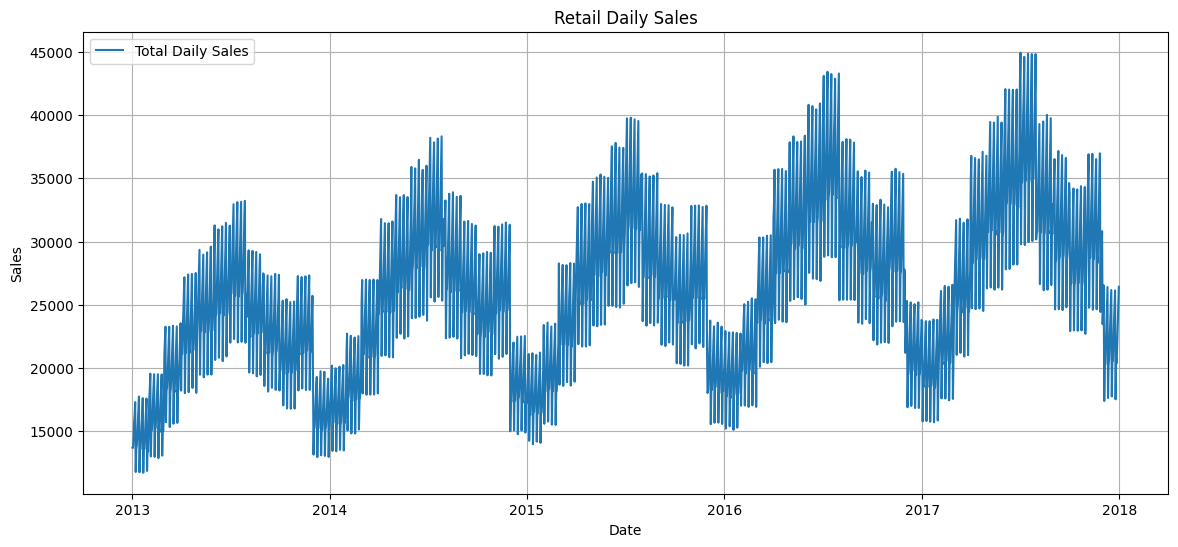

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label='Total Daily Sales')
plt.title("Retail Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("✅ Series is stationary")
    else:
        print("❌ Series is NOT stationary")

adf_test(daily_sales)


ADF Statistic: -3.060244118701342
p-value: 0.02963864926884404
✅ Series is stationary


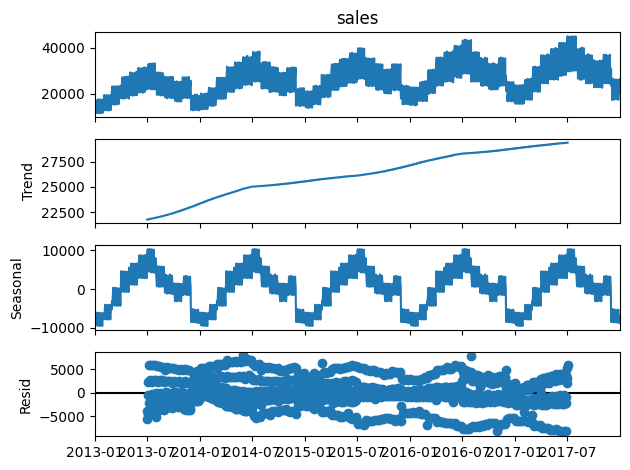

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_sales, model='additive', period=365)
decomposition.plot()
plt.show()


In [ ]:
train = daily_sales[:-90]
test = daily_sales[-90:]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1736
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -13935.322
Date:                           Tue, 13 May 2025   AIC                          27880.644
Time:                                   16:54:34   BIC                          27907.917
Sample:                               01-01-2013   HQIC                         27890.732
                                    - 10-02-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9271      0.007    127.759      0.000       0.913       0.941
ma.L1         -1.0000      0.009   -113.594

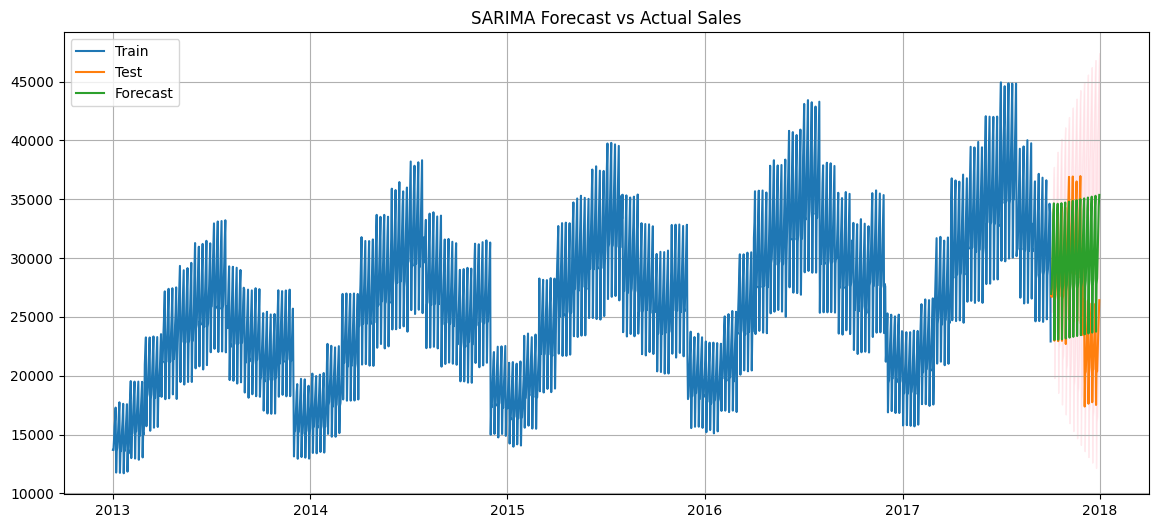

In [ ]:
forecast = results.get_forecast(steps=90)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred, label='Forecast')
plt.fill_between(pred.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 3420.87
RMSE: 4873.60


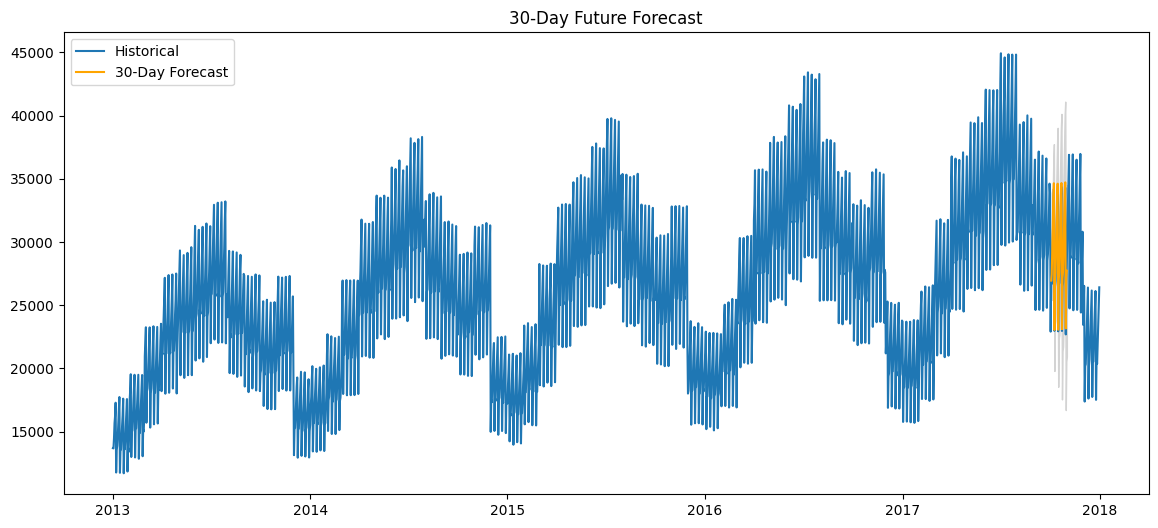

In [ ]:
future_forecast = results.get_forecast(steps=30)
future_pred = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales, label='Historical')
plt.plot(future_pred, label='30-Day Forecast', color='orange')
plt.fill_between(future_pred.index, future_conf_int.iloc[:,0], future_conf_int.iloc[:,1], color='lightgray')
plt.title('30-Day Future Forecast')
plt.legend()
plt.show()
